# Laboratorio 5

Juan Camilo Gallego 
CC: 1000098978

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor

# 1 Análisis del data frame

## Pregunta 1

Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Pregunta 2

Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# Se eliminan los valores nulos
df.dropna(inplace=True)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Excepto por ocean_proximity todos los valores son float, se tiene que las std son relativamente altas comparadas con su media respectiva por lo que los datos estan muy distribuidos

## Pregunta 3

Determinar los elementos únicos dentro de la columna ocean_proximity.

In [7]:
df.loc[:,'ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## Pregunta 4

Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.

In [8]:
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
ocean_means = df.groupby('ocean_proximity')[cols].mean()
ocean_means

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
INLAND,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
NEAR OCEAN,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023


## Pregunta 5

Construye un histograma para cada columna, puede emplear la libreria de seaborn.

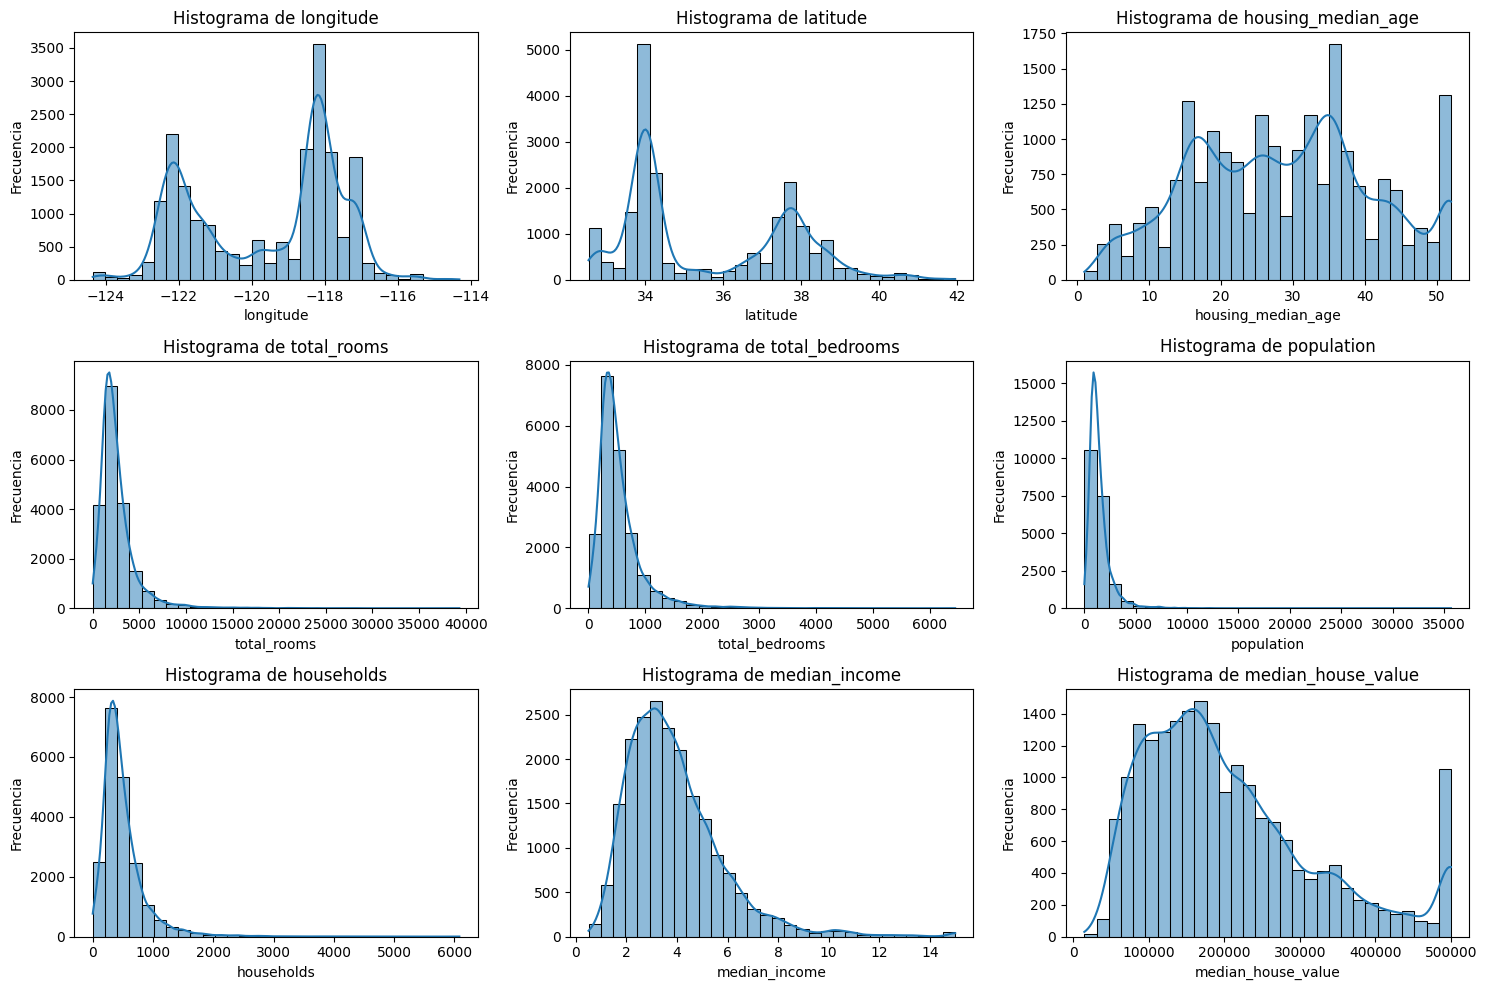

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()  

for i, columna in enumerate(df.columns):
    if columna == 'ocean_proximity':
        continue
    sns.histplot(data=df, x=columna, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histograma de {columna}')
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

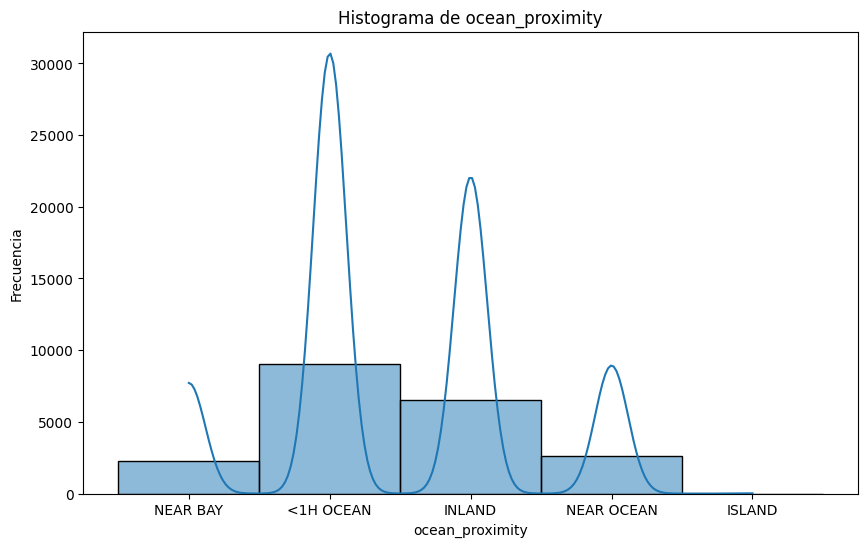

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ocean_proximity', kde=True, bins=30)
plt.title(f'Histograma de ocean_proximity')
plt.xlabel('ocean_proximity')
plt.ylabel('Frecuencia')
plt.show()

Podemos ver como la toma de datos se dio alrededor de dos localidades por los datos de lat y long, ademas es de esperar las distribuciones obtenidas para el numero de cuartos, numero de dormitorios ... debido a que por lo general son pocos y es raro que incrementen.

## Pregunta 6

### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]
88.5
52.5


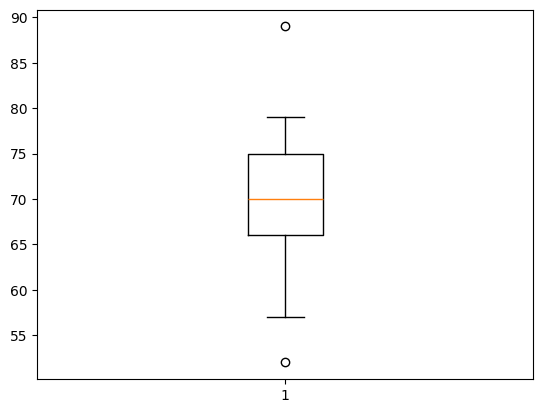

In [11]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)
plt.show()

## Pregunta 7

Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

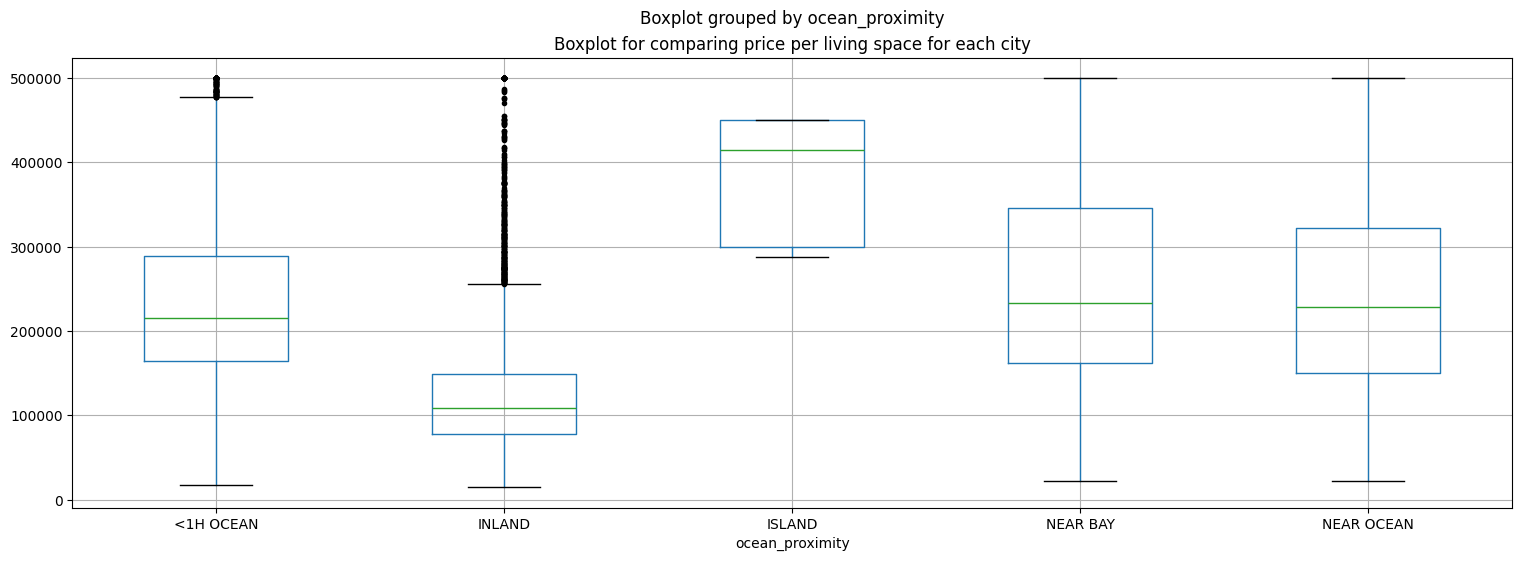

In [12]:
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()


Diagnosis: NEAR BAY
  Muestras: 2270
  Q1: 162500.000, Q3: 346000.000, IQR: 183500.000
  Límites: [-112750.000, 621250.000]
  Outliers encontrados: 0

Diagnosis: <1H OCEAN
  Muestras: 9034
  Q1: 164300.000, Q3: 289475.000, IQR: 125175.000
  Límites: [-23462.500, 477237.500]
  Outliers encontrados: 595
  Valores outliers: [500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 483500. 500001. 500001. 500001. 500001. 500001. 500001. 483100.
 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 500001. 500001. 500001. 478400. 500001. 495500. 500001. 500001.
 500001. 500001. 500001. 500001. 500001. 490800. 500001. 500001. 495600.
 500001. 500001. 483800. 500001. 497600. 500001. 500001. 495600. 500001.
 500001. 500001. 500001. 500001. 500001. 498700. 500001. 500001. 500001.
 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 500001. 50

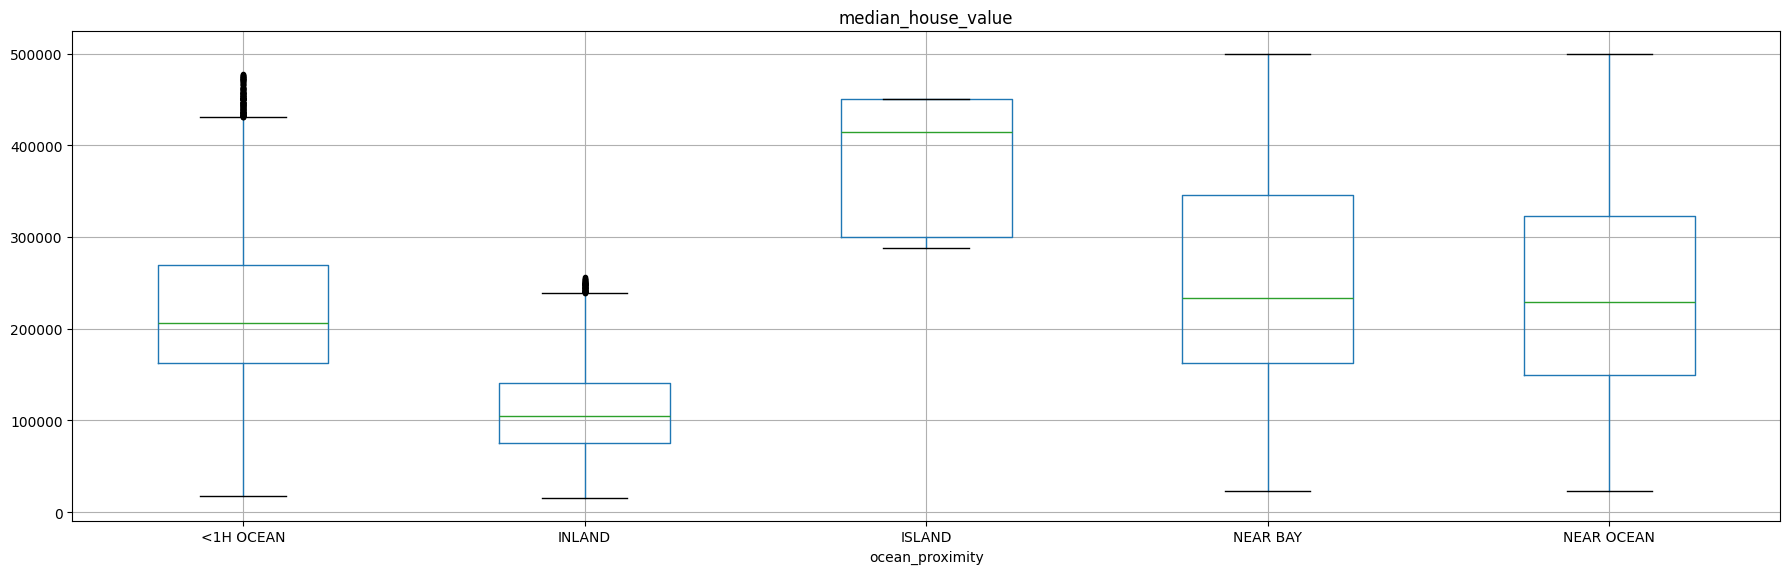

In [13]:
df_clean = df.copy()

total_outliers = 0

for diagnosis in df['ocean_proximity'].unique():
    # Filtrar datos por diagnosis
    mask = df['ocean_proximity'] == diagnosis
    subset = df.loc[mask, 'median_house_value']
    
    # Calcular quartiles e IQR
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir límites para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers_mask = (subset < lower_bound) | (subset > upper_bound)
    n_outliers = outliers_mask.sum()
    total_outliers += n_outliers
    
    # Mostrar estadísticas
    print(f"\nDiagnosis: {diagnosis}")
    print(f"  Muestras: {len(subset)}")
    print(f"  Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}")
    print(f"  Límites: [{lower_bound:.3f}, {upper_bound:.3f}]")
    print(f"  Outliers encontrados: {n_outliers}")
    
    if n_outliers > 0:
        print(f"  Valores outliers: {subset[outliers_mask].values.round(3)}")
    
    # Eliminar outliers de este grupo
    outlier_indices = subset[outliers_mask].index
    df_clean = df_clean[~df_clean.index.isin(outlier_indices)]

print(f"Outliers eliminados: {total_outliers}")

# # Después de eliminar outliers
df_clean.boxplot(column="median_house_value", by='ocean_proximity', sym='k.', figsize=(18, 6))
plt.suptitle('')
plt.tight_layout()
plt.show()

Aunque se eliminaron muchos outliers se debe tener en cuenta que la distribucion de los datos era demasiado dispersa, por eso mismo al volver a realizar un diagrama de caja se obtiene que algunos valores son outliers para la distribucion nueva (datos ya filtrados), pero no lo son para la original.

## Pregunta 8

Determina la matrix de correlación.

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

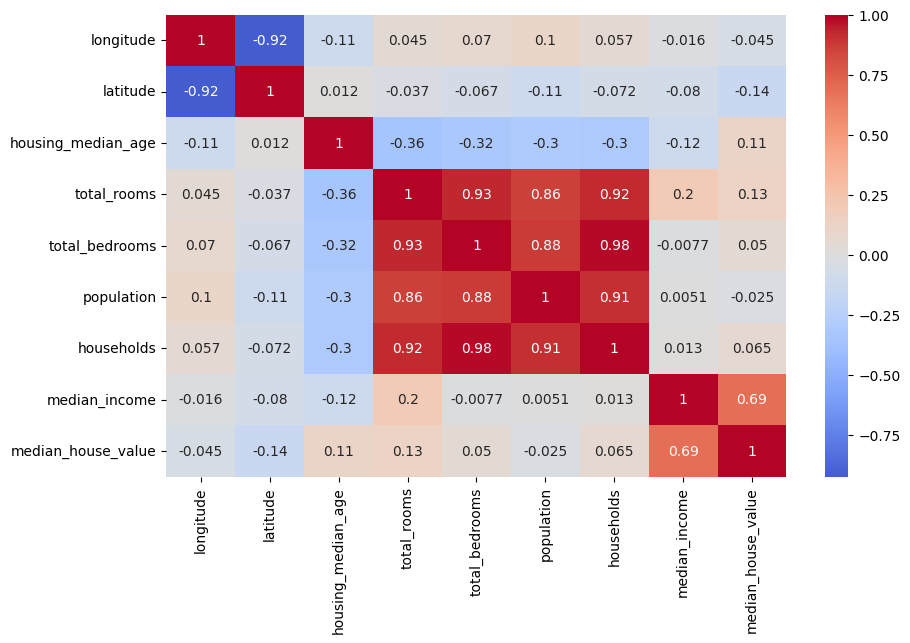

In [14]:
df_2 = df.copy()
df_2.drop(columns=['ocean_proximity'], inplace=True)
corr_matrix = df_2.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

Se observa una correlacion alta entre los numeros de tipo de habitaciones entre si y la cantidad de casas en los vecindarios, tambien hay una relacion entre mayor poder adquisitivo mayor valor de la casa comprada.

## Pregunta 9

con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

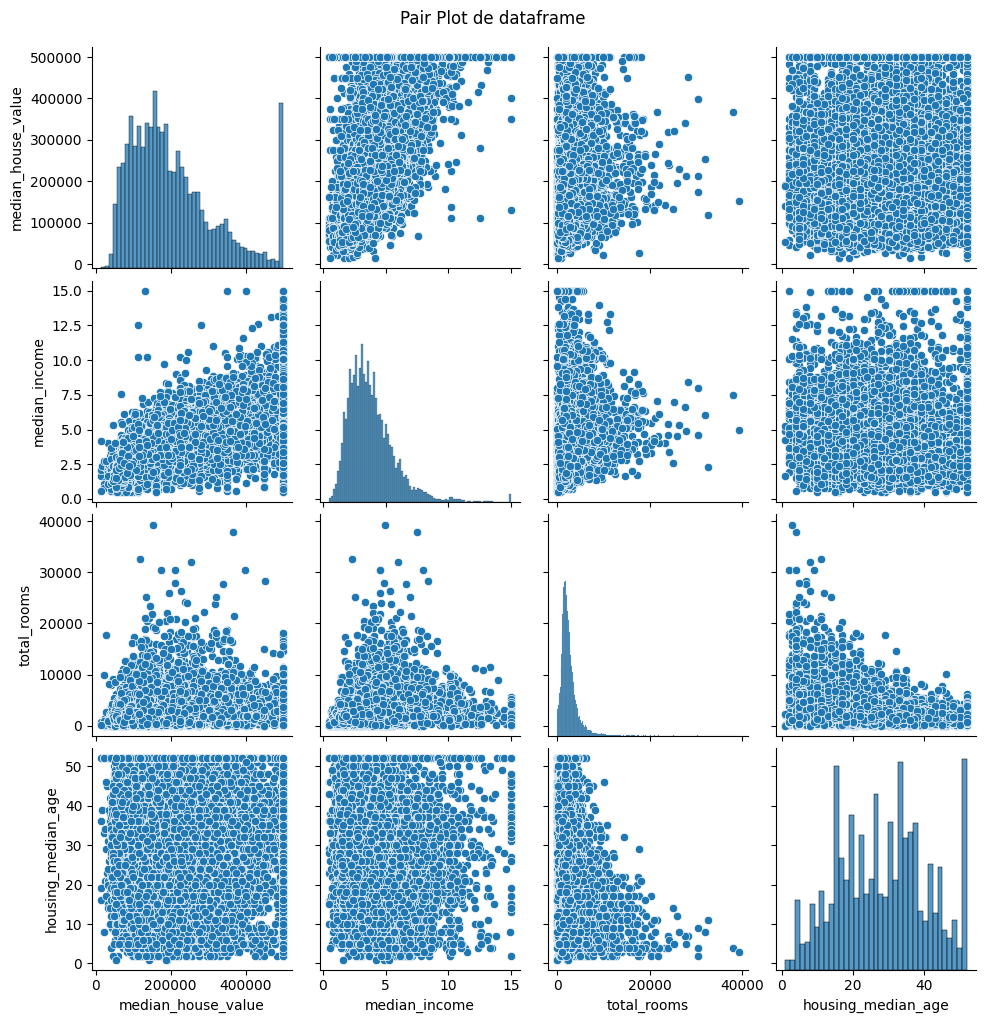

In [15]:
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

sns.pairplot(df[cols])
plt.suptitle('Pair Plot de dataframe', y=1.02)
plt.show()

## Pregunta 10

Realiza un scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

In [16]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

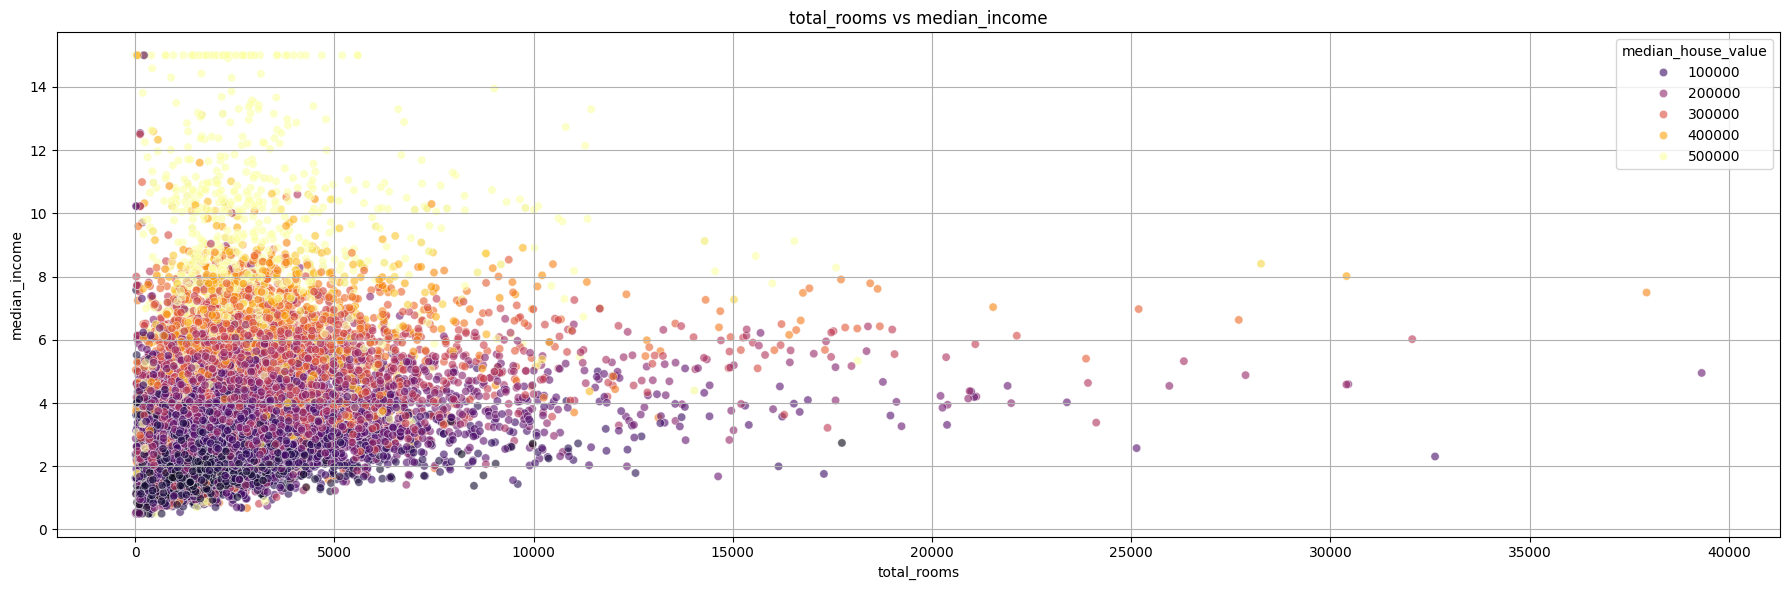

In [17]:
x = 'total_rooms'
y = 'median_income'

plt.figure(figsize=(18, 6))
sns.scatterplot(
    data = df,
    x = x,
    y = y,
    hue = 'median_house_value',
    palette = 'inferno',
    alpha = 0.6
)
plt.title(f'{x} vs {y}')
plt.xlabel(x)
plt.ylabel(y)
plt.grid()
plt.tight_layout()
plt.show()

Se puede ver que las casas mas caras son las que menos habitaciones tienen en el distrito, porque estas estan en lugares de pocos hogares para mucho espacio, ademas de que son compradas por personas con un salario mas alto en general como es de esperar.

# 2 Preparacion del data frame

## Pregunta 11

¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```


In [18]:

train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16346
4087


Teniendo en cuenta el numero de datos del dataset se puede decir que es una cantidad significativa como para que una separacion aleatoria de los datos de un resultado correcto.

## Pregunta 12

División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

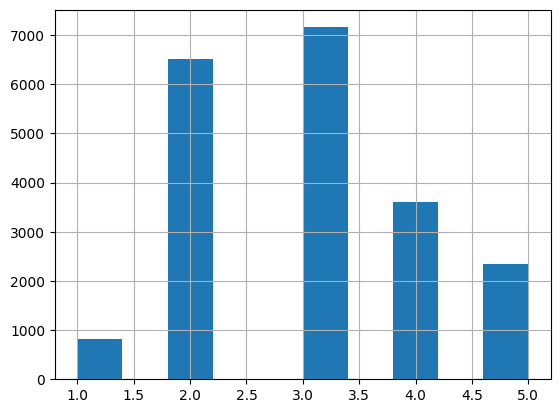

In [19]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
df.income_cat.hist()
plt.show()

In [20]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.iloc[train_index]
  strat_test_set = df.iloc[test_index]

df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039838,0.039883,0.038904,2.343711,0.113051
2,0.318847,0.318816,0.317348,0.470218,0.009787
3,0.350218,0.350135,0.354783,1.303667,0.023760
4,0.176724,0.176658,0.173232,1.975809,0.037478
5,0.114374,0.114509,0.115733,1.188213,0.118570


Se puede ver que los datos separados de manera aleatoria tienen un resultado decente pero los separados con stratified sample se ajustan mucho mejor a la distribucion original de los datos por lo que generan una muestra mucho mejor.

## Pregunta 13

Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

In [21]:
df_train = df.copy()
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2,5.329513,0.219892,2.123209


In [22]:
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()

q=pd.DataFrame(q)
q.isnull().sum()

total_bedrooms    0
dtype: int64

In [23]:
df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19570689e+02,  3.56332213e+01,  2.86330935e+01,  2.63650423e+03,
        5.37870553e+02,  1.42494695e+03,  4.99433465e+02,  3.87116160e+00,
        2.06864413e+05,  3.00694954e+00,  5.43134394e+00,  2.13038830e-01,
        3.07153285e+00])

En caso de que hubieran datos faltantes en una fila estos se reemplazan por la media respectiva


## Pregunta 14

Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```

In [24]:
df_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20433 non-null  float64 
 1   latitude                  20433 non-null  float64 
 2   housing_median_age        20433 non-null  float64 
 3   total_rooms               20433 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20433 non-null  float64 
 6   households                20433 non-null  float64 
 7   median_income             20433 non-null  float64 
 8   median_house_value        20433 non-null  float64 
 9   income_cat                20433 non-null  category
 10  rooms_per_household       20433 non-null  float64 
 11  bedrooms_per_room         20433 non-null  float64 
 12  population_per_household  20433 non-null  float64 
dtypes: category(1), float64(12)
memory usage: 2.0 MB


In [25]:
df_train_num['income_cat'] = df_train_num['income_cat'].astype(np.float64)
df_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20433 non-null  float64
 1   latitude                  20433 non-null  float64
 2   housing_median_age        20433 non-null  float64
 3   total_rooms               20433 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20433 non-null  float64
 6   households                20433 non-null  float64
 7   median_income             20433 non-null  float64
 8   median_house_value        20433 non-null  float64
 9   income_cat                20433 non-null  float64
 10  rooms_per_household       20433 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20433 non-null  float64
dtypes: float64(13)
memory usage: 2.2 MB


In [26]:
imp_mean.statistics_
df_train_num.median()

longitude                     -118.490000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2127.000000
total_bedrooms                 435.000000
population                    1166.000000
households                     409.000000
median_income                    3.536500
median_house_value          179700.000000
income_cat                       3.000000
rooms_per_household              5.230769
bedrooms_per_room                0.203162
population_per_household         2.817582
dtype: float64

In [27]:
X = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2.0,5.045455,0.224625,2.560606
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2.0,6.114035,0.215208,3.122807
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2.0,5.205543,0.215173,2.325635
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2.0,5.329513,0.219892,2.123209


In [28]:
X.shape

(20433, 13)

## Pregunta 15 

### Manejo de texto y atributos categóricos

¿Qué realizan las siguientes lineas de código?

```python
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```

In [29]:
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [30]:
housing_tr_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2.0,5.045455,0.224625,2.560606,0.0,1.0,0.0,0.0,0.0
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2.0,6.114035,0.215208,3.122807,0.0,1.0,0.0,0.0,0.0
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2.0,5.205543,0.215173,2.325635,0.0,1.0,0.0,0.0,0.0
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2.0,5.329513,0.219892,2.123209,0.0,1.0,0.0,0.0,0.0


El codigo lo que hace es crear una matriz donde se corresponden los valores correspondientes a una caracteristica de ocean_proximity con un 1 sino con un cero y luego lo concatena al dataframe en housting_tr_ de esta manera vemos que dependiendo de la caracteristica que tenga cada fila o dato solo tiene un 1 para la caracteristica correspondiente.

## Pregunta 16

### Escalamiento de variables

Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```

In [31]:
cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]

housing_scale=housing_tr_[cols]
housing_scale

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)

housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)
housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.0,1.0,0.0,0.0,0.0
20429,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.0,1.0,0.0,0.0,0.0
20430,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.0,1.0,0.0,0.0,0.0
20431,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.0,1.0,0.0,0.0,0.0


Literalmente normalizamos todas las variables, esto es lo que usa MinMaxScaler -> X_scaled = (X - X_min) / (X_max - X_min)

## Pregunta 17

Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

In [32]:
def data_preprocess(
    df,
    num_cols=["longitude", "latitude", "housing_median_age", "total_rooms",
              "total_bedrooms", "population", "households", "median_income"],
    cat_col="ocean_proximity",
    target_col="median_house_value",
    strat_bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    strat_labels=[1, 2, 3, 4, 5],
    test_size=0.2,
    random_state=42,
):
    """
    Preprocesa el dataset de California Housing:
      - Stratified split por income_cat
      - OneHotEncoder para la columna categórica
      - MinMaxScaler para todas las features (num + one-hot)

    Returns:
      X_train_scaled, X_test_scaled, y_train, y_test
    """
    df = df.copy()

    # Limpiar solo lo necesario para el split y las features
    needed_cols = list(set(num_cols + [cat_col, target_col, "median_income"]))
    df = df.dropna(subset=needed_cols)

    # Variable de estratificación
    df["income_cat"] = pd.cut(df["median_income"],
                              bins=strat_bins, labels=strat_labels, include_lowest=True)

    # Stratified split
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    for train_idx, test_idx in split.split(df, df["income_cat"]):
        strat_train_set = df.iloc[train_idx].drop(columns=["income_cat"]).copy()
        strat_test_set  = df.iloc[test_idx].drop(columns=["income_cat"]).copy()

    # y
    y_train = strat_train_set[target_col].copy()
    y_test  = strat_test_set[target_col].copy()

    # X base
    X_train = strat_train_set[num_cols + [cat_col]].copy()
    X_test  = strat_test_set[num_cols + [cat_col]].copy()

    # One-Hot (fit en train, transform en test)
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    train_cat = encoder.fit_transform(X_train[[cat_col]])
    test_cat  = encoder.transform(X_test[[cat_col]])

    cat_cols = encoder.categories_[0].tolist()  # nombres = categorías
    X_train = X_train.drop(columns=[cat_col]).join(
        pd.DataFrame(train_cat, index=X_train.index, columns=cat_cols)
    )
    X_test = X_test.drop(columns=[cat_col]).join(
        pd.DataFrame(test_cat, index=X_test.index, columns=cat_cols)
    )

    # Asegurar mismas columnas y mismo orden
    feature_cols = num_cols + cat_cols
    X_train = X_train.reindex(columns=feature_cols, fill_value=0)
    X_test  = X_test.reindex(columns=feature_cols,  fill_value=0)

    # Escalado
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),
                                  columns=feature_cols, index=X_train.index)
    X_test_scaled  = pd.DataFrame(scaler.transform(X_test),
                                  columns=feature_cols, index=X_test.index)

    return X_train_scaled, X_test_scaled, y_train, y_test


## Pregunta 18, 19, 20 y 21

¿que puede concluir respecto al modelo empleado?

¿El modelo de regresión lineal es valido para lo construido?

¿qué informacion nos da el score?

¿Puede ser ajustado a otro modelo?

In [33]:
X_train, X_test, y_train, y_test = data_preprocess(df)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("modelo lineal:")
print("mse :", mse)
print("rmse:", rmse)
print("mae :", mae)
print("R²  :", r2)

modelo lineal:
mse : 4568064690.292385
rmse: 67587.45956383023
mae : 49336.520574934555
R²  : 0.6521949277829926


El modelo de regresion lineal puede considerarse valido pero no tiene un muy buen resultado, solo de 0.65 de score que nos indica que tan bien se ajustan los datos a nuestra regresion lineal.

Efectivamente se puede usar otro modelo para ajustar los datos del problema.

In [34]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("R²:", r2_score(y_test, y_pred))

R²: 0.8184894552570154


## Pregunta 22

¿Como puede autmatizar todo el proceso empleando pipelines?

In [35]:
def add_extra_features(X):
    X = X.copy()
    X["rooms_per_household"] = X["total_rooms"] / X["households"]
    X["bedrooms_per_room"] = X["total_bedrooms"] / X["total_rooms"]
    X["population_per_household"] = X["population"] / X["households"]
    return X

def build_pipeline(df, test_size=0.2, random_state=42):
    df = df.copy()

    # Crear variable de estratificación
    df["income_cat"] = pd.cut(df["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    for train_idx, test_idx in split.split(df, df["income_cat"]):
        train_set = df.iloc[train_idx].drop(columns=["income_cat"]).copy()
        test_set  = df.iloc[test_idx].drop(columns=["income_cat"]).copy()

    # Separar X e y
    y_train = train_set["median_house_value"].copy()
    y_test  = test_set["median_house_value"].copy()
    X_train = train_set.drop(columns=["median_house_value"])
    X_test  = test_set.drop(columns=["median_house_value"])

    # Columnas numéricas y categóricas
    num_attribs = ["longitude", "latitude", "housing_median_age",
                   "total_rooms", "total_bedrooms", "population",
                   "households", "median_income",
                   "rooms_per_household", "bedrooms_per_room", "population_per_household"]
    cat_attribs = ["ocean_proximity"]

    # Pipeline numérico + categórico
    preprocess = ColumnTransformer([
        ("num", MinMaxScaler(), num_attribs),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs)
    ])

    # Pipeline completo
    pipeline = Pipeline([
        ("extra", FunctionTransformer(add_extra_features)),
        ("preprocess", preprocess),
        ("lin_reg", LinearRegression())
    ])

    return pipeline, X_train, X_test, y_train, y_test

pipeline, X_train, X_test, y_train, y_test = build_pipeline(df)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("modelo lineal con pipelines:")
print("mse :", mse)
print("rmse:", rmse)
print("mae :", mae)
print("R²  :", r2)

modelo lineal con pipelines:
mse : 4427337395.416004
rmse: 66538.24009857794
mae : 48503.75520593883
R²  : 0.6629096768673035
